#H2H12563K - Himanshu Maski

##Milestone 1

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HRC/Final (1).csv')

In [ ]:
df.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


In [ ]:
df.shape

(1101925, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

In [ ]:
df.isnull().sum()

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64

In [ ]:
df.fillna('NaN', inplace = True)

In [ ]:
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format = "%Y%m%d")

In [ ]:
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'], format = "%Y%m%d")

In [ ]:
df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']].shape[0]

27142

In [ ]:
if df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']].shape[0] == 0:
    print('No order creation date is after requested delivery date')
else:
    print('There are order creation date after requested delivery date')

df = df[df['ORDER_CREATION_DATE'] <= df['REQUESTED_DELIVERY_DATE']]

df.shape

There are order creation date after requested delivery date


(1074783, 16)

In [ ]:
df[df['ORDER_AMOUNT'].str.contains('-')].shape[0]

32

In [ ]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace('-', '')

In [ ]:
df[df['ORDER_AMOUNT'].str.contains(',')].shape[0]

1073406

In [ ]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace(',', '.')

In [ ]:
df[df['ORDER_CREATION_DATE'] == df['REQUESTED_DELIVERY_DATE']].shape[0]

100437

In [ ]:
df['ORDER_CURRENCY'].value_counts()

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64

In [ ]:
conversion_rates = {
    'USD': 1.0,
    'EUR': 1.08,
    'AUD': 0.66,
    'CAD': 0.74,
    'GBP': 1.24,
    'MYR': 0.22,
    'PLN': 0.24,
    'AED': 0.27,
    'HKD': 0.13,
    'CHF': 1.11,
    'RON': 0.22,
    'SGD': 0.74,
    'CZK': 0.046,
    'HU1': 0.0028,
    'NZD': 0.61,
    'BHD': 2.65,
    'SAR': 0.27,
    'QAR': 0.27,
    'KWD': 3.25,
    'SEK':0.094
}

df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')

def convert_to_usd(row):
    if row['ORDER_CURRENCY'] != 'USD' and pd.notnull(row['ORDER_AMOUNT']):
        return row['ORDER_AMOUNT'] * conversion_rates.get(row['ORDER_CURRENCY'], 0)
    else:
        return row['ORDER_AMOUNT']

df['amount_in_usd'] = df.apply(convert_to_usd, axis=1)
print(df['amount_in_usd'])

0           1030.9788
1            850.3488
2          72892.9368
3           1517.9832
4              0.0000
              ...    
1101920     3267.2406
1101921        0.0000
1101922        0.0000
1101923        0.0000
1101924     3267.2406
Name: amount_in_usd, Length: 1074783, dtype: float64


In [ ]:
df[df['amount_in_usd'] == '0'].shape[0]

0

In [ ]:
df['uniue_cust_id'] = df['CUSTOMER_NUMBER'] + df['COMPANY_CODE']

##Milestone - 2

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

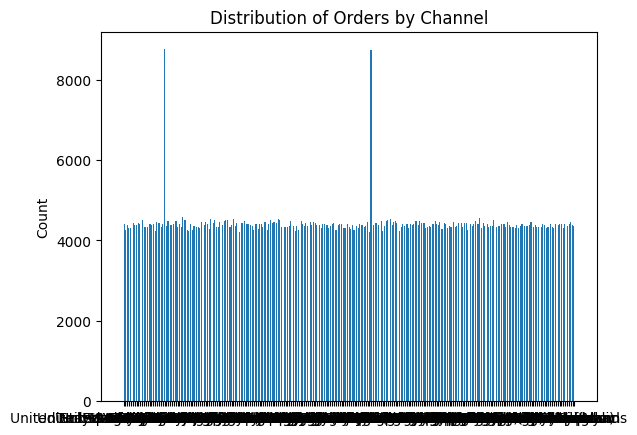

In [ ]:
plt.hist(df["DISTRIBUTION_CHANNEL"], bins = 400)
plt.ylabel("Count")
plt.title("Distribution of Orders by Channel")
plt.show()

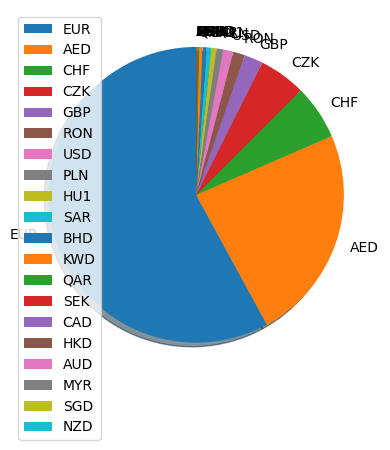

In [ ]:
plt.pie(df["ORDER_CURRENCY"].value_counts(),labels = df["ORDER_CURRENCY"].unique(),shadow = True,startangle = 90)
plt.legend(df["ORDER_CURRENCY"].unique())
plt.show()

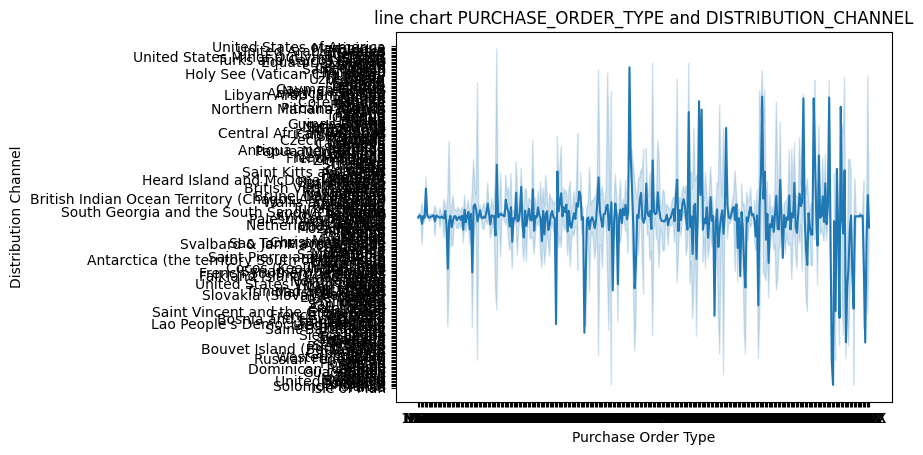

In [ ]:
sns.lineplot(x = df["PURCHASE_ORDER_TYPE"], y = df["DISTRIBUTION_CHANNEL"], data = df)
plt.title("line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL")
plt.xlabel('Purchase Order Type')
plt.ylabel('Distribution Channel')
plt.show()

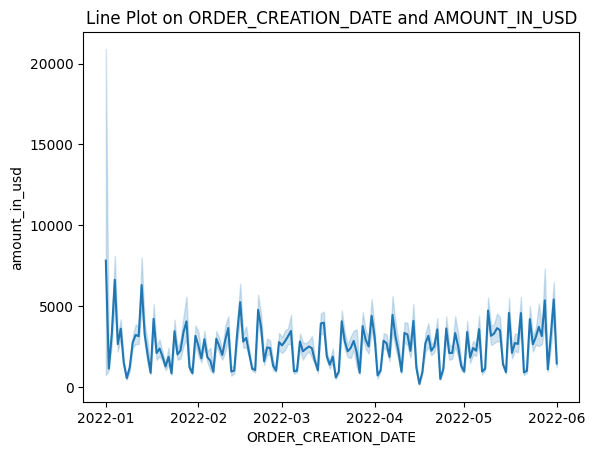

In [ ]:
sns.lineplot(data = df, x = "ORDER_CREATION_DATE" , y = "amount_in_usd")
plt.xlabel = ("ORDER_CREATION_DATE")
plt.ylabel = ("amount_in_usd")
plt.title("Line Plot on ORDER_CREATION_DATE and AMOUNT_IN_USD")
plt.show()

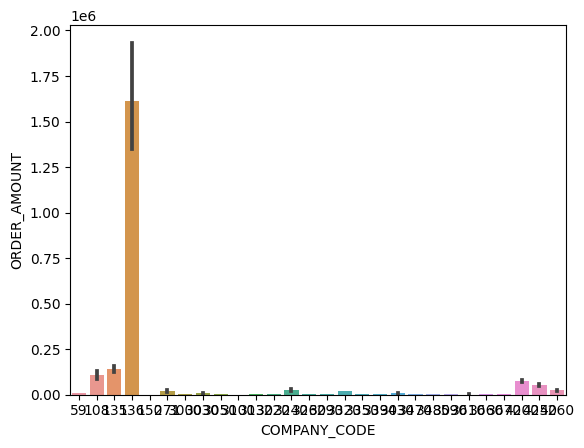

In [ ]:
sns.barplot(x='COMPANY_CODE', y='ORDER_AMOUNT', data=df)
plt.xlabel = ("Company Code")
plt.ylabel = ("Order Amount")
plt.title = ("Order Amount by Company Code")
plt.show()

##Milestone - 3

<Axes: xlabel='amount_in_usd'>

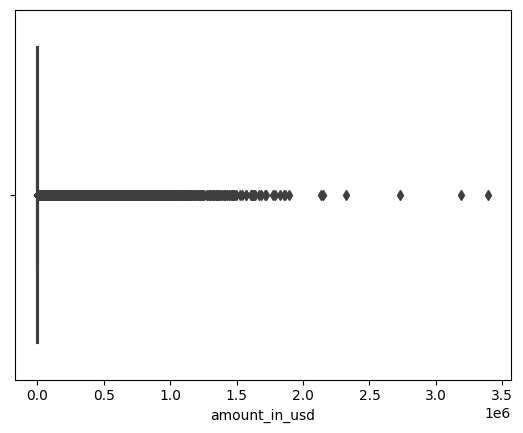

In [ ]:
sns.boxplot(x = df['amount_in_usd'])

In [ ]:
# Removing outliers using 1.5 * IQR method
lower_bound = df['amount_in_usd'].quantile(0.25) - 1.5 * (df['amount_in_usd'].quantile(0.75) - df['amount_in_usd'].quantile(0.25))
upper_bound = df['amount_in_usd'].quantile(0.75) + 1.5 * (df['amount_in_usd'].quantile(0.75) - df['amount_in_usd'].quantile(0.25))

df['amount_in_usd'] = np.where(df['amount_in_usd'] < lower_bound, lower_bound, df['amount_in_usd'])
df['amount_in_usd'] = np.where(df['amount_in_usd'] > upper_bound, upper_bound, df['amount_in_usd'])

<Axes: xlabel='amount_in_usd'>

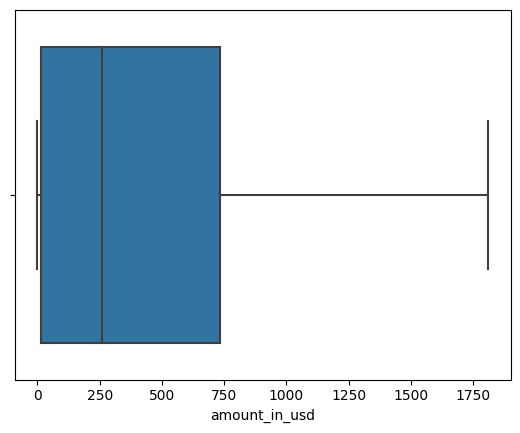

In [ ]:
sns.boxplot(x = df['amount_in_usd'])

In [ ]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [ ]:
categorical = []
continious = []

for col in df.columns:
  if df[col].dtypes == 'object':
    categorical.append(col)
  else:
    continious.append(col)

In [ ]:
categorical

['DISTRIBUTION_CHANNEL',
 'DIVISION',
 'RELEASED_CREDIT_VALUE',
 'PURCHASE_ORDER_TYPE',
 'CREDIT_CONTROL_AREA',
 'ORDER_CURRENCY',
 'CREDIT_STATUS']

In [ ]:
continious

['CUSTOMER_ORDER_ID',
 'SALES_ORG',
 'COMPANY_CODE',
 'ORDER_CREATION_DATE',
 'ORDER_CREATION_TIME',
 'SOLD_TO_PARTY',
 'ORDER_AMOUNT',
 'REQUESTED_DELIVERY_DATE',
 'CUSTOMER_NUMBER',
 'amount_in_usd',
 'uniue_cust_id']

In [ ]:
#Label Encoding
le = LabelEncoder()
categorical.append('ORDER_CREATION_DATE')
categorical.append('REQUESTED_DELIVERY_DATE')
for col in categorical:
    df[col] = le.fit_transform(df[col].astype('str'))

In [ ]:
#log transformation
continious.remove('REQUESTED_DELIVERY_DATE')
continious.remove('ORDER_CREATION_DATE')
for col in continious:
    df[col] = df[col].apply(lambda x: np.log(x).astype('float'))

In [ ]:
df.dtypes

CUSTOMER_ORDER_ID          float64
SALES_ORG                  float64
DISTRIBUTION_CHANNEL         int64
DIVISION                     int64
RELEASED_CREDIT_VALUE        int64
PURCHASE_ORDER_TYPE          int64
COMPANY_CODE               float64
ORDER_CREATION_DATE          int64
ORDER_CREATION_TIME        float64
CREDIT_CONTROL_AREA          int64
SOLD_TO_PARTY              float64
ORDER_AMOUNT               float64
REQUESTED_DELIVERY_DATE      int64
ORDER_CURRENCY               int64
CREDIT_STATUS                int64
CUSTOMER_NUMBER            float64
amount_in_usd              float64
uniue_cust_id              float64
dtype: object

In [ ]:
grouped_df = df.groupby('PURCHASE_ORDER_TYPE').agg({
    'ORDER_AMOUNT': ['mean'],
    'RELEASED_CREDIT_VALUE': ['sum'],
    'CUSTOMER_NUMBER': ['nunique'],
    'amount_in_usd': ['max'],
    'CREDIT_STATUS': ['count'],
    'ORDER_CREATION_DATE': ['min'],
    'REQUESTED_DELIVERY_DATE': ['max']
}).reset_index()

grouped_df.columns = ['PURCHASE_ORDER_TYPE', 'avg_order_amount', 'total_credit_value', 'unique_customers', 'max_amount_usd', 'total_credit_status', 'min_order_creation_date', 'max_requested_delivery_date']

grouped_df

,PURCHASE_ORDER_TYPE,avg_order_amount,total_credit_value,unique_customers,max_amount_usd,total_credit_status,min_order_creation_date,max_requested_delivery_date
0,0,NaN,10075224,45,7.501517,13657,0,234
1,1,NaN,111,2,5.989085,111,7,147
2,2,NaN,132798,3,7.501517,13,27,111
3,3,NaN,121473442,145,7.501517,9777,1,277
4,4,NaN,118017875,69,7.501517,6271,3,179
...,...,...,...,...,...,...,...,...
346,346,9.069760,44885,1,7.501517,1,6,18
347,347,7.824670,85,4,7.501517,85,12,83
348,348,7.642846,14290,2,7.501517,2,12,27
349,349,1.399518,2,1,2.491551,2,121,121


TypeError: ignored

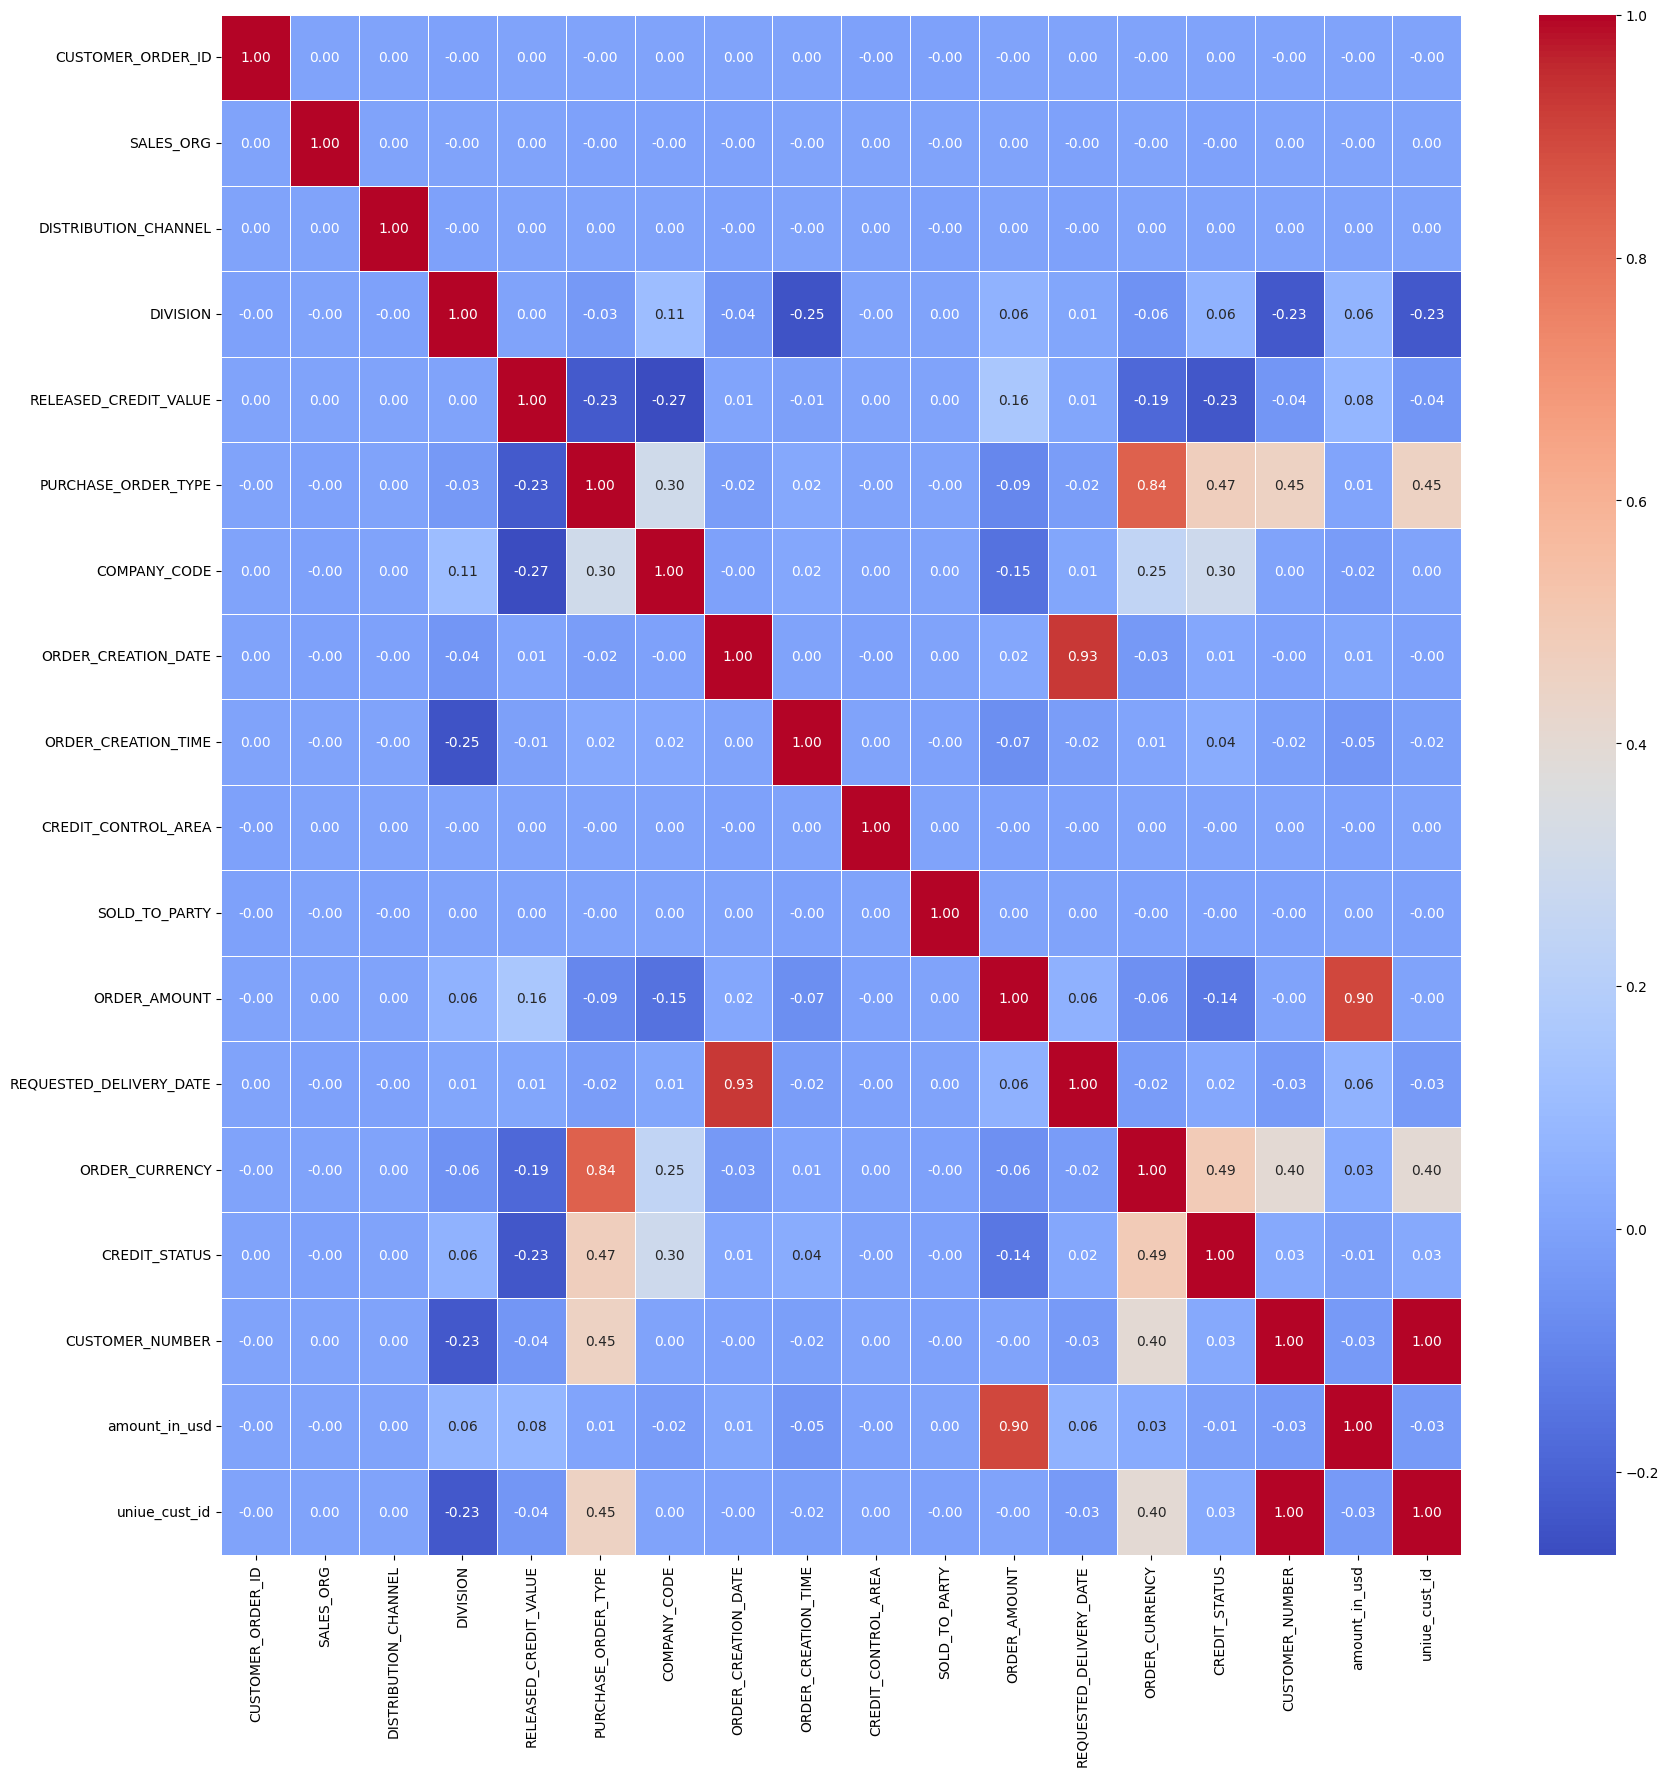

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
corr_matrix = df.corr().abs()


threshold = 0.7

high_corr_var = []
n_cols = corr_matrix.shape[1]
for i in range(n_cols):
    for j in range(i+1, n_cols):
        if corr_matrix.iloc[i, j] > threshold or corr_matrix.iloc[i, j] < -0.7:
            col_i = corr_matrix.columns[i]
            col_j = corr_matrix.columns[j]
            high_corr_var.append((col_i, col_j))

In [ ]:
high_corr_var

[('PURCHASE_ORDER_TYPE', 'ORDER_CURRENCY'),
 ('ORDER_CREATION_DATE', 'REQUESTED_DELIVERY_DATE'),
 ('ORDER_AMOUNT', 'amount_in_usd'),
 ('CUSTOMER_NUMBER', 'uniue_cust_id')]

##Milestone - 4

In [ ]:
grouped_df = df.groupby(['RELEASED_CREDIT_VALUE', 'CREDIT_STATUS']).size().reset_index(name='Max Credit')

df = df.merge(grouped_df, on=['RELEASED_CREDIT_VALUE', 'CREDIT_STATUS'], how='left')

In [ ]:
copy1 = df.copy()

In [ ]:
#dropping the unwanted columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074783 entries, 0 to 1074782
Data columns (total 19 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1074783 non-null  float64
 1   SALES_ORG                1074783 non-null  float64
 2   DISTRIBUTION_CHANNEL     1074783 non-null  int64  
 3   DIVISION                 1074783 non-null  int64  
 4   RELEASED_CREDIT_VALUE    1074783 non-null  int64  
 5   PURCHASE_ORDER_TYPE      1074783 non-null  int64  
 6   COMPANY_CODE             1074783 non-null  float64
 7   ORDER_CREATION_DATE      1074783 non-null  int64  
 8   ORDER_CREATION_TIME      1074783 non-null  float64
 9   CREDIT_CONTROL_AREA      1074783 non-null  int64  
 10  SOLD_TO_PARTY            1074783 non-null  float64
 11  ORDER_AMOUNT             1074783 non-null  float64
 12  REQUESTED_DELIVERY_DATE  1074783 non-null  int64  
 13  ORDER_CURRENCY           1074783 non-null 

In [ ]:
df.drop('CUSTOMER_ORDER_ID', axis=1, inplace=True)
df.drop('SALES_ORG', axis=1, inplace=True)
df.drop('DISTRIBUTION_CHANNEL', axis=1, inplace=True)
df.drop('DIVISION', axis=1, inplace=True)
df.drop('RELEASED_CREDIT_VALUE', axis=1, inplace=True)

In [ ]:
df.drop('CREDIT_CONTROL_AREA', axis=1, inplace=True)

In [ ]:
df.drop('ORDER_CURRENCY', axis=1, inplace=True)
df.drop('CREDIT_STATUS', axis=1, inplace=True)

In [ ]:
df.drop('ORDER_AMOUNT', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074783 entries, 0 to 1074782
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   PURCHASE_ORDER_TYPE      1074783 non-null  int64  
 1   COMPANY_CODE             1074783 non-null  float64
 2   ORDER_CREATION_DATE      1074783 non-null  int64  
 3   ORDER_CREATION_TIME      1074782 non-null  float64
 4   SOLD_TO_PARTY            1074783 non-null  float64
 5   REQUESTED_DELIVERY_DATE  1074783 non-null  int64  
 6   amount_in_usd            836962 non-null   float64
 7   uniue_cust_id            1074783 non-null  float64
 8   Max Credit               1074783 non-null  int64  
 9   CUSTOMER_NUMBER          1074783 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 90.2 MB


In [ ]:
nan_counts = df.isna().sum()

# Count the number of '0' values in each column
zero_counts = (df == 0).sum()

print(nan_counts)

print(zero_counts)

PURCHASE_ORDER_TYPE        0
COMPANY_CODE               0
ORDER_CREATION_DATE        0
ORDER_CREATION_TIME        0
SOLD_TO_PARTY              0
REQUESTED_DELIVERY_DATE    0
amount_in_usd              0
uniue_cust_id              0
Max Credit                 0
CUSTOMER_NUMBER            0
dtype: int64
PURCHASE_ORDER_TYPE        0
COMPANY_CODE               0
ORDER_CREATION_DATE        0
ORDER_CREATION_TIME        0
SOLD_TO_PARTY              0
REQUESTED_DELIVERY_DATE    0
amount_in_usd              0
uniue_cust_id              0
Max Credit                 0
CUSTOMER_NUMBER            0
dtype: int64


In [ ]:
median_amount_in_usd = df['amount_in_usd'].median()
df['amount_in_usd'] = df['amount_in_usd'].fillna(median_amount_in_usd)

median_ORDER_CREATION_TIME = df['ORDER_CREATION_TIME'].median()
df['ORDER_CREATION_TIME'] = df['ORDER_CREATION_TIME'].fillna(median_ORDER_CREATION_TIME)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.dummy import DummyRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge, ARDRegression, SGDRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
X = df.drop('amount_in_usd', axis=1)
y = df['amount_in_usd']

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_list = [
    ("Linear Regression", LinearRegression()),
    ("Lasso Regression", Lasso()),
    ("Ridge Regression", Ridge()),
    # ("Support Vector Machine", SVR()),--->>> was taking too much time
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("AdaBoost", AdaBoostRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("K-Nearest Neighbors", KNeighborsRegressor()),
]

In [ ]:
train_X = np.nan_to_num(train_X)
train_y = np.nan_to_num(train_y)
for name, model in model_list:
    # Train the model
    model.fit(train_X, train_y)

    # Test the model
    pred_y = model.predict(test_X)

    # Calculate evaluation metrics
    mse = mean_squared_error(test_y, pred_y)
    rmse = np.sqrt(mse)
    r2 = r2_score(test_y, pred_y)
    mape = np.mean(np.abs((test_y - pred_y) / test_y)) * 100
    pev = (1 - mse / np.var(test_y)) * 100

    # Print the results
    print(name)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R2 Score:", r2)
    print("Mean Absolute Percentage Error (MAPE):", mape)
    print("Percentage of Explained Variance (PEV):", pev)
    print("----------------------------------------")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Linear Regression
Mean Squared Error: 1.3935001184789007
Root Mean Squared Error: 1.1804660598589443
R2 Score: 0.01989777820465133
Mean Absolute Percentage Error (MAPE): 22.917265485507077
Percentage of Explained Variance (PEV): 1.989777820465144
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.17179e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Lasso Regression
Mean Squared Error: 1.412916009300465
Root Mean Squared Error: 1.1886614359440055
R2 Score: 0.006241835531949569
Mean Absolute Percentage Error (MAPE): 23.03439233469615
Percentage of Explained Variance (PEV): 0.624183553194968
----------------------------------------
Ridge Regression
Mean Squared Error: 1.3937210435294562
Root Mean Squared Error: 1.1805596315008642
R2 Score: 0.019742393120697255
Mean Absolute Percentage Error (MAPE): 22.916137222227498
Percentage of Explained Variance (PEV): 1.9742393120697366
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


Decision Tree
Mean Squared Error: 1.0401523070605956
Root Mean Squared Error: 1.019878574664943
R2 Score: 0.2684208823258286
Mean Absolute Percentage Error (MAPE): 13.536171867924013
Percentage of Explained Variance (PEV): 26.84208823258286
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Random Forest
Mean Squared Error: 0.5902116353376703
Root Mean Squared Error: 0.768252325305736
R2 Score: 0.5848814596762623
Mean Absolute Percentage Error (MAPE): 10.971003565622835
Percentage of Explained Variance (PEV): 58.48814596762624
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(


AdaBoost
Mean Squared Error: 1.194542612539833
Root Mean Squared Error: 1.0929513312768475
R2 Score: 0.1598322432455268
Mean Absolute Percentage Error (MAPE): 17.719847521923242
Percentage of Explained Variance (PEV): 15.98322432455268
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


Gradient Boosting
Mean Squared Error: 0.8461934279083849
Root Mean Squared Error: 0.9198877257080806
R2 Score: 0.4048396209202132
Mean Absolute Percentage Error (MAPE): 16.16062159218824
Percentage of Explained Variance (PEV): 40.48396209202133
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


K-Nearest Neighbors
Mean Squared Error: 0.6486209177311445
Root Mean Squared Error: 0.805370050182613
R2 Score: 0.5437999651803702
Mean Absolute Percentage Error (MAPE): 10.909550971691106
Percentage of Explained Variance (PEV): 54.37999651803702
----------------------------------------


In [ ]:
from sklearn.linear_model import Ridge

# Create a Ridge regression model with regularization parameter alpha
alpha = 0.1  # adjust the regularization strength
ridge_model = Ridge(alpha=alpha)

# Fit the model to the training data
ridge_model.fit(train_X, train_y)

# Predict on the test data
y_pred = ridge_model.predict(test_X)

# Calculate evaluation metrics
mse = mean_squared_error(test_y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)

Mean Squared Error (MSE): 1.3937210178685413
Root Mean Squared Error (RMSE): 1.1805596206327496
R2 Score: 0.01974241116900577


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.17185e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.linear_model import ElasticNet

# Create an ElasticNet regression model with regularization parameters alpha and l1_ratio
alpha = 0.1  # adjust the regularization strength
l1_ratio = 0.5  # adjust the L1 and L2 ratio
elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

# Fit the model to the training data
elasticnet_model.fit(train_X, train_y)

# Predict on the test data
y_pred = elasticnet_model.predict(test_X)

# Calculate evaluation metrics
mse = mean_squared_error(test_y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)


Mean Squared Error (MSE): 1.3971958132162856
Root Mean Squared Error (RMSE): 1.1820303774507175
R2 Score: 0.017298453974135986


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer

# Split the dataframe into features (X) and target variable (y)
X = df.drop('amount_in_usd', axis=1)
y = df['amount_in_usd']

# Define the random forest regressor
rf_regressor = RandomForestRegressor()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_grid, n_iter=10,
                                   scoring=make_scorer(mean_squared_error, greater_is_better=False),
                                   cv=5, random_state=42)

# Fit the random search on the data
random_search.fit(X, y)

# Print the best hyperparameters and corresponding mean squared error
print("Best Hyperparameters:", random_search.best_params_)
print("Best MSE:", abs(random_search.best_score_))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

KeyboardInterrupt: ignored